In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [13]:
#Loading Dataset
df = pd.read_csv("/work/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [15]:
df.shape

(250, 5)

In [17]:
#Describing the Dataset
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,250.000000,250.00000,250.000000,250.000000
mean,125.500000,38.49200,95.592000,50.244000
std,72.312977,13.17026,77.308758,27.289914
min,1.000000,18.00000,15.000000,1.000000
25%,63.250000,29.00000,47.000000,27.000000
50%,125.500000,36.00000,70.000000,50.000000
75%,187.750000,47.75000,101.000000,74.000000
max,250.000000,70.00000,325.000000,99.000000


In [19]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [21]:
df.drop(["CustomerID"], axis=1, inplace=True)

In [23]:
#Showing first few rows
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


/tmp/ipykernel_41/2649227207.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
/tmp/ipykernel_41/2649227207.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x], bins=20)
/tmp/ipykernel_41/2649227207.py:7: UserWarning: 

`distplot` is a deprecated function and will be remo

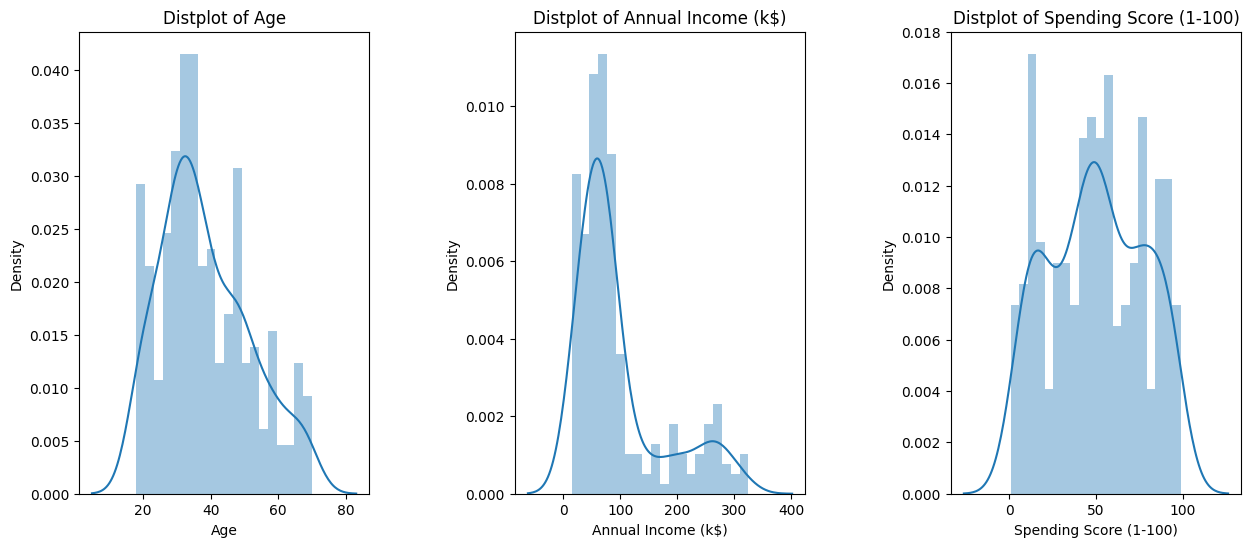

In [51]:
#Distribution Plot
plt.figure(1, figsize=(15, 6))
n = 0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.distplot(df[x], bins=20)
    plt.title("Distplot of {}".format(x))
plt.show()

In [53]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [34]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

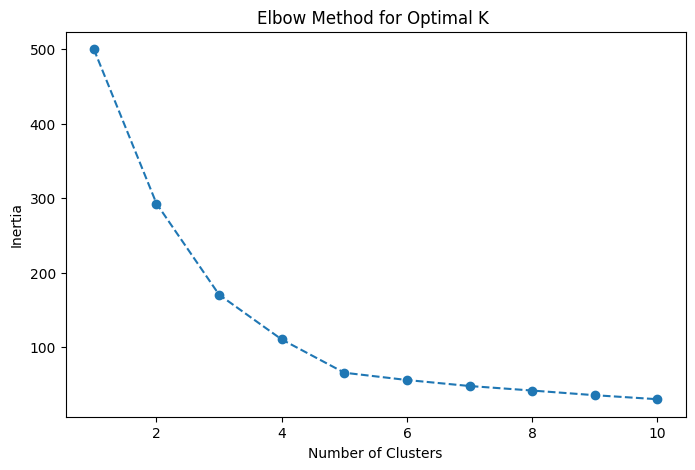

In [38]:
#Finding optimal number of Clusters using Elbow Method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker= 'o', linestyle='--')
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K ")
plt.show()

In [40]:
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(X_scaled)

In [42]:
sil_score = silhouette_score(X_scaled, df["Cluster"])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.53


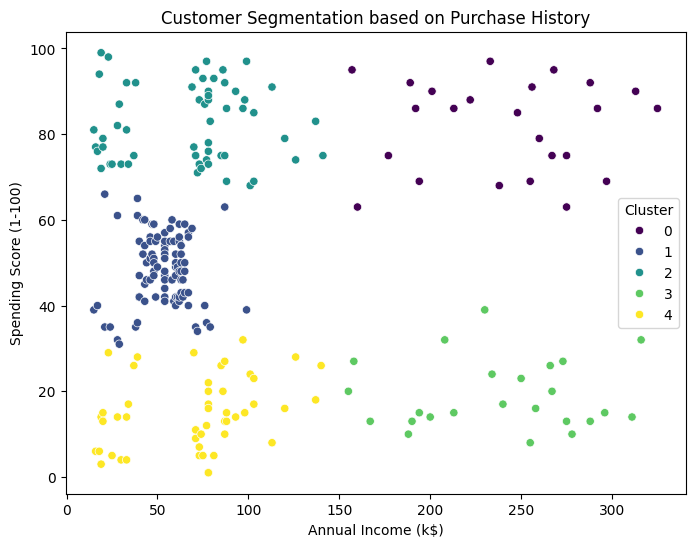

In [60]:
#Visualizing the Clusters
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette="viridis")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("Customer Segmentation based on Purchase History")
plt.legend(title="Cluster")
plt.show()

In [62]:
#Showing first few Clustered Customers
print(df.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0    Male   19                  15                      39        1
1    Male   21                  15                      81        2
2  Female   20                  16                       6        4
3  Female   23                  16                      77        2
4  Female   31                  17                      40        1


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=4fbe5271-a713-480e-b14b-cbbac33c994e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>